# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [16]:
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV


In [17]:
data = pd.read_csv("diabetes.csv")

X = data.drop(columns=['Diabetes'])
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)


xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\apavl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [19]:
y_pred_ada = ada_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

ada_accuracy = accuracy_score(y_test, y_pred_ada)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"AdaBoost Accuracy: {ada_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

AdaBoost Accuracy: 0.94
Gradient Boosting Accuracy: 0.94
XGBoost Accuracy: 0.94


In [20]:
model_predictions = {
    "AdaBoost": ada_model.predict(X_test),
    "Gradient Boosting": gb_model.predict(X_test),
    "XGBoost": xgb_model.predict(X_test)
}

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


for model_name, y_pred in model_predictions.items():
    evaluate_model(y_test, y_pred, model_name)


AdaBoost Performance:
Accuracy: 0.94
Precision: 0.95
Recall: 0.84
F1 Score: 0.89

Gradient Boosting Performance:
Accuracy: 0.94
Precision: 0.95
Recall: 0.84
F1 Score: 0.89

XGBoost Performance:
Accuracy: 0.94
Precision: 0.94
Recall: 0.84
F1 Score: 0.89


In [21]:
xgb_model_no_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model_l1_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, alpha=0.1, random_state=42)
xgb_model_l2_reg = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, reg_lambda=1, random_state=42)

xgb_model_no_reg.fit(X_train, y_train)
xgb_model_l1_reg.fit(X_train, y_train)
xgb_model_l2_reg.fit(X_train, y_train)

y_pred_no_reg = xgb_model_no_reg.predict(X_test)
y_pred_l1_reg = xgb_model_l1_reg.predict(X_test)
y_pred_l2_reg = xgb_model_l2_reg.predict(X_test)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC AUC": roc_auc}

metrics_no_reg = evaluate_model(y_test, y_pred_no_reg)
metrics_l1_reg = evaluate_model(y_test, y_pred_l1_reg)
metrics_l2_reg = evaluate_model(y_test, y_pred_l2_reg)

print("\nModel without Regularization:")
for metric, value in metrics_no_reg.items():
    print(f"{metric}: {value:.2f}")

print("\nModel with L1 Regularization:")
for metric, value in metrics_l1_reg.items():
    print(f"{metric}: {value:.2f}")

print("\nModel with L2 Regularization:")
for metric, value in metrics_l2_reg.items():
    print(f"{metric}: {value:.2f}")


Model without Regularization:
Accuracy: 0.94
Precision: 0.94
Recall: 0.84
F1 Score: 0.89
ROC AUC: 0.91

Model with L1 Regularization:
Accuracy: 0.94
Precision: 0.94
Recall: 0.84
F1 Score: 0.89
ROC AUC: 0.91

Model with L2 Regularization:
Accuracy: 0.94
Precision: 0.94
Recall: 0.84
F1 Score: 0.89
ROC AUC: 0.91


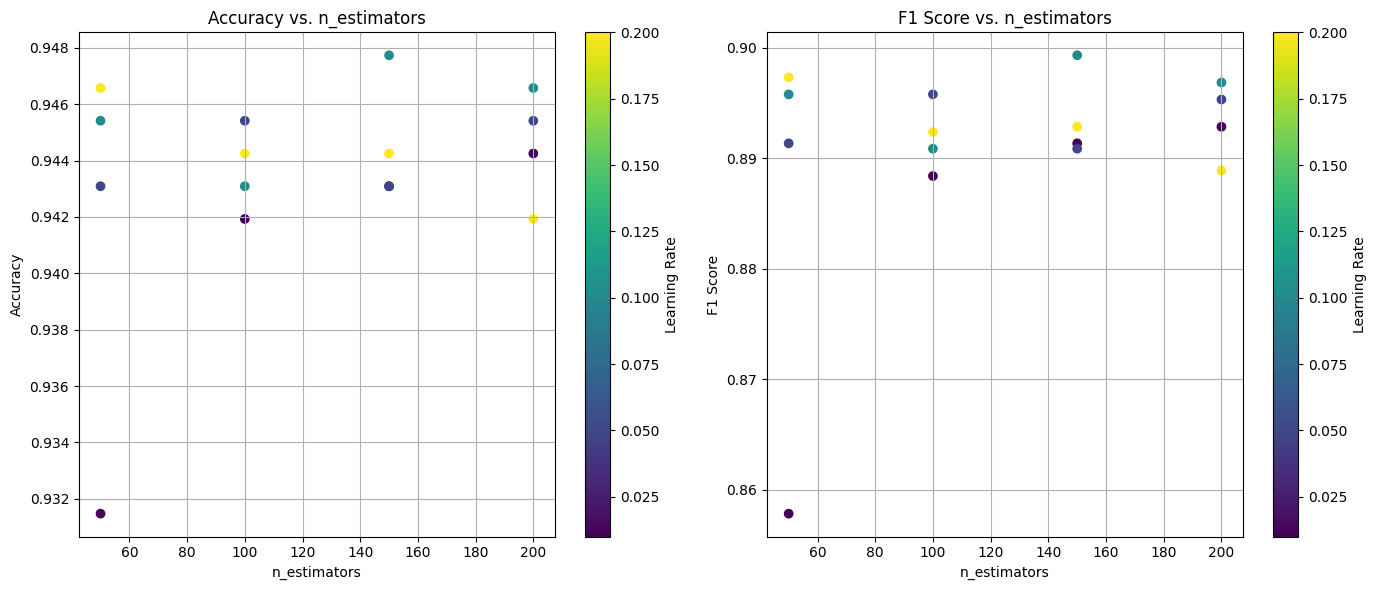

In [22]:
def test_hyperparameters(n_estimators_list, learning_rate_list):
    results = {'n_estimators': [], 'learning_rate': [], 'accuracy': [], 'f1': []}
    
    
    for n in n_estimators_list:
        for lr in learning_rate_list:
           
            model = XGBClassifier(n_estimators=n, learning_rate=lr, max_depth=3, random_state=42)
            model.fit(X_train, y_train)
            
            
            y_pred = model.predict(X_test)
            metrics = evaluate_model(y_test, y_pred)
            
            
            results['n_estimators'].append(n)
            results['learning_rate'].append(lr)
            results['accuracy'].append(metrics['Accuracy'])
            results['f1'].append(metrics['F1 Score'])
    
    return results


n_estimators_list = [50, 100, 150, 200]
learning_rate_list = [0.01, 0.05, 0.1, 0.2]


results = test_hyperparameters(n_estimators_list, learning_rate_list)


n_estimators_array = np.array(results['n_estimators'])
learning_rate_array = np.array(results['learning_rate'])
accuracy_array = np.array(results['accuracy'])
f1_array = np.array(results['f1'])


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter1 = plt.scatter(n_estimators_array, accuracy_array, c=learning_rate_array, cmap='viridis')
plt.colorbar(scatter1, label='Learning Rate')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(n_estimators_array, f1_array, c=learning_rate_array, cmap='viridis')
plt.colorbar(scatter2, label='Learning Rate')
plt.title('F1 Score vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Conclusion: The model without regularization and the model with L2 regularization showed the same results in all metrics. These models achieve an accuracy of 94.3% and have the best F1-measure (0.8909) and ROC-AUC (0.9123).
The model with L1 regularization showed slightly worse results. Its accuracy is 94.19%, and the F1 and ROC-AUC indicators also decreased slightly.